# Group Project: Pulsar Star Data 

### Introduction 

##### What are Pulsar Stars?

Pulsar stars are a very rare type of Neutron star that produce radio emission detectable on Earth. As pulsar stars rotate rapidly, their emission beam sweeps across the sky, producing a detectable pattern of broadband radio emission that repeats periodically. As such, pulsar search involves looking for periodic radio signals with large radio telescopes.

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation. Within the data set, each potential signal detection is known as a “candidate”. The “candidate” is then averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However, as pulsar stars are detected using large radio telescopes, other radio signals are also picked up in this way, causing confusion in identifying which waves come from pulsars and which are noise. Almost all detections in practice are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.  

##### The Dataset

The HTRU2 dataset contains data about pulsars, both examples caused by RFI and/or noise, and real pulsar examples. Legitimate pulsar examples are a minority positive class, and spurious examples the majority negative class. The dataset contains a total of 17,898 samples of radio signals. This is an imbalanced dataset: 1,639 are real pulsar wave patterns while 16,259 are non-pulsar signals.

Each candidate is described by 8 continuous variables, and a single class variable. Although the data file does not contain column names, they can be round in the readme attached in the .zip. The first four are simple statistics obtained from the integrated pulse profile, an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency. The remaining four variables are similarly obtained from the DM-SNR curve, a Dispersion Measure - Signal- to-Noise Ratio curve that is obtained through the pulsar star signal. The 8 variables are as such: 

Mean of the integrated profile.

Standard deviation of the integrated profile.

Excess kurtosis of the integrated profile.

Skewness of the integrated profile.

Mean of the DM-SNR curve.

Standard deviation of the DM-SNR curve.

Excess kurtosis of the DM-SNR curve.

Skewness of the DM-SNR curve.

Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive). 

##### The Question

Trying to predict whether certain data given is a pulsar star or not??? 



#### Method

- split data into training and testing data (with respect to the ratio of real and not real puslar stars)
- specify which variable we will use 
- standardize (scale center) all variables
- fold?
- find out which k is most optimal to use 
- build model with best k
- confusion matrix?

#### Expected Outcomes and Significance 

- expect to find - a model with high accuracy?
- could filter whether or not a certain signal is a pulsar or random radio noise?
- what makes a pulsar and radio noise different? 

In [1]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0  

In [ ]:
# all code comments are prompts to help with writing explanations/markdown comments

In [3]:
# briefly explain how setting the seed allows reproducibility

In [4]:
set.seed(77)

In [5]:
# Explain column name abbreviations (and meaning too? if word count allows)

In [6]:
# reading in data via unzip
# renaming columns since orig. data had no column names

# elaboration of unzipping the file:
# Create a temp. file name (eg tempfile())
# Use download.file() to fetch the file into the temp. file
# Use unz() to extract the target file from temp. file
# Remove the temp file via unlink()

# make sure you explicitly mention that the file is readable from the web

In [7]:
temp <- tempfile()
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip",temp)
conn <- unz(temp, "HTRU_2.csv")
data <- read_csv(conn, col_names = FALSE)
unlink(temp)
data <- rename(data,
               mean = X1,
               st_dev = X2,
               e_kurtosis = X3,
               skewness = X4,
               snr_mean = X5,
               snr_st_dev = X6,
               snr_e_kurtosis = X7,
               snr_skewness = X8,
               class = X9) |>
    mutate(class = as_factor(class))
data

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): X1, X2, X3, X4, X5, X6, X7, X8, X9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mean,st_dev,e_kurtosis,skewness,snr_mean,snr_st_dev,snr_e_kurtosis,snr_skewness,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
136.4297,59.84742,-0.1878456,-0.73812297,1.296823,12.16606,15.450260,285.931022,0
122.5547,49.48561,0.1279781,0.32306090,16.409699,44.62689,2.945244,8.297092,0
119.3359,59.93594,0.1593631,-0.74302540,21.430602,58.87200,2.499517,4.595173,0


In [8]:
# counting the data points in each class
# Do we need to talk about class bias? Depends on the predictors we choose (And we will correct for this via oversampling? (refer to textbook 5.7.2))

In [9]:
counts <- data |>
    group_by(class) |>
    summarize(n=n())

counts

class,n
<fct>,<int>
0,16259
1,1639


In [10]:
# checking how many rows with missing values
# explain what we might do if there are any

In [11]:
missing_vals <- sum(is.na(data))
missing_vals

[1] 0

In [12]:
# there are no missing values therefore we dont need to take the steps we said we might have otherwise needed to

In [13]:
# split the data into training and testing

In [14]:
data_split <- initial_split(data, prop = 0.75, strata = class)
data_train <- training(data_split)
data_test <- testing(data_split)

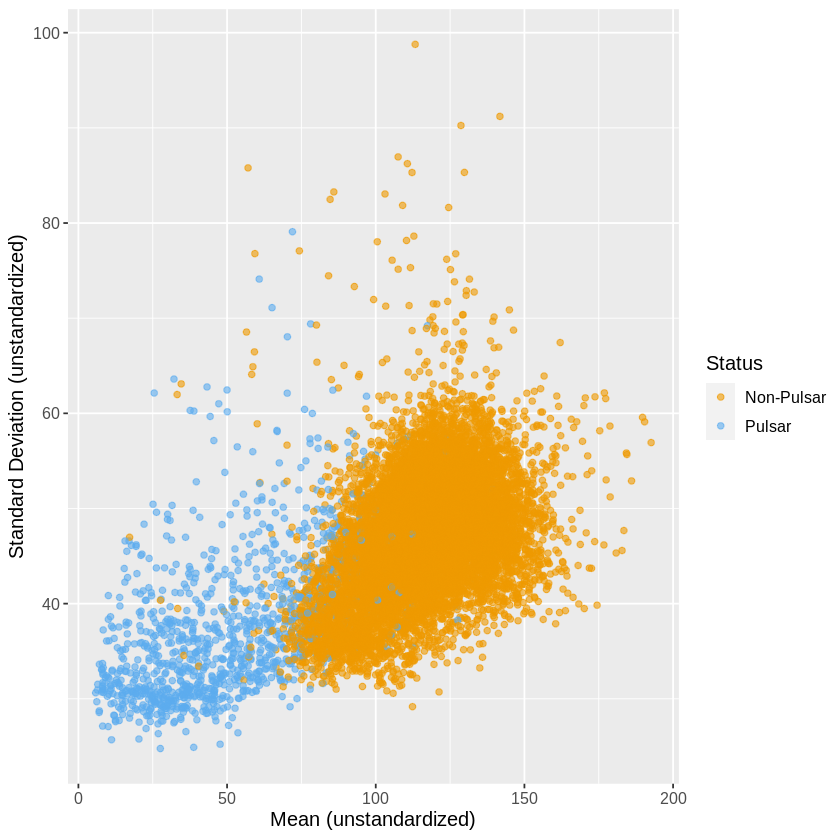

In [15]:
mean_stdev <- data_train |>
  ggplot(aes(x = mean, y = st_dev, color = class)) +
  geom_point(alpha = 0.6) +
  labs(x = "Mean (unstandardized)", 
       y = "Standard Deviation (unstandardized)",
       color = "Status") +
  scale_color_manual(labels = c("Non-Pulsar", "Pulsar"), 
                     values = c("orange2", "steelblue2")) +
  theme(text = element_text(size = 12))
mean_stdev